# 5. Finding and Extracting Communities (Q5)


Airlines can optimize their operations by identifying communities within a flight network. These communities represent groups of airports with strong connections, helping airlines pinpoint high-demand regions for expansion or underserved areas for consolidation. By analyzing these communities, airlines can improve resource allocation, reduce costs, and enhance service quality.



1. In this task, you are asked to analyze the graph and identify the communities based on the flight network provided. For the airline, the primary focus is on the cities, so your communities should reflect the connectivity between cities through the flights that link them.

# Girvan Newman method

##### Pseudo Code for Depth-First Search (DFS) RECURSIVE

Input:

    Graph G = (V, E) as an adjacency list
    Source node s

Output:

    Set of visited nodes
    Previous nodes for path reconstruction

Procedure DFS_Recursive(G, s):

    Initialize:
        visited ← Empty set                  # Tracks visited nodes
        prev ← Empty dictionary              # To reconstruct paths
    
    Function Explore(u):
        Mark u as visited
        For each neighbor v of u:
            If v is not in visited:
                prev[v] ← u                  # Track parent
                Explore(v)                   # Recursive call

    Explore(s)                               # Start DFS from source
    Return visited, prev

##### Pseudo Code for Depth-First Search (DFS) ITERATIVE

Input:

    Graph G = (V, E) as an adjacency list
    Source node s

Output:

    Set of visited nodes
    Previous nodes for path reconstruction

Procedure DFS_Iterative(G, s):

    Initialize:
        visited ← Empty set                 # Tracks visited nodes
        prev ← Empty dictionary             # To reconstruct paths
        Stack S = []                        # LIFO stack
    
    Push s onto S                           # Start DFS from source

    While S is not empty:
        u ← S.pop()                         # Process the most recent node
        
        If u is not in visited:
            Mark u as visited
            For each neighbor v of u:
                If v is not in visited:
                    prev[v] ← u             # Track parent
                    S.push(v)               # Push neighbor onto stack

    Return visited, prev

Time Complexity: $O(V+E)$ for both

##### Psuedo Code for Breadth-First Search (BFS)

Input:

    Graph G = (V, E) as an adjacency list
    Source node s

Output:

    Distance from s to each reachable node
    Previous nodes for path reconstruction

Procedure BFS(G, s):

    Initialize:
        dist[u] ← ∞ for all nodes u ∈ V     # Tentative distances
        dist[s] ← 0                         # Distance to source is 0
        prev[u] ← None for all u ∈ V        # To reconstruct paths
        Queue Q = []                        # FIFO queue
    
    Enqueue s into Q                        # Start from the source node

    While Q is not empty:
        u ← Q.dequeue()                     # Dequeue the front node

        For each neighbor v of u:
            If dist[v] == ∞:                # Unvisited node
                dist[v] ← dist[u] + 1       # Update distance
                prev[v] ← u                 # Track parent
                Q.enqueue(v)                # Enqueue neighbor

    Return dist, prev                     

Time Complexity: $O(V+E)$

##### Pseudo Code for Dijkstra's Algorithm
Input:

    Graph G = (V, E) as an adjacency list
    Edge weights w(u, v) > 0
    Source node s

Output:

    Shortest distances from s to all nodes
    Previous nodes to reconstruct the paths

Procedure Dijkstra(G, s):

    Initialize:
        dist[u] ← ∞ for all nodes u ∈ V     # Tentative distances
        dist[s] ← 0                         # Distance to source is 0
        prev[u] ← None for all u ∈ V        # To reconstruct paths
        PriorityQueue Q = []                # Min-heap: (distance, node)

    Insert (0, s) into Q                    # Start from the source node

    While Q is not empty:
        (current_dist, u) ← Q.pop()         # Node with smallest distance

        For each neighbor v of u:
            weight ← w(u, v)                # Edge weight
            distance ← current_dist + weight
            
            If distance < dist[v]:          # Found a shorter path
                dist[v] ← distance
                prev[v] ← u
                Q.push((distance, v))       # Update priority queue

    Return dist, prev                     


Time Complexity:  $O(V+E)logV)$ using a binary heap.


### Our Implementation of Girvan-Newman
The Girvan-Newman algorithm is a community detection method for graphs that works by progressively removing edges with the highest betweenness centrality. It identifies communities (connected subgraphs) by breaking the graph apart iteratively.

1. Calculate Edge Betweenness Centrality: Betweenness measures how often an edge appears on the shortest paths between nodes.
We can use either:

- BFS: Efficient for unweighted graphs.

- Dijkstra: General-purpose for weighted graphs.

2. Remove the Edge with Highest Betweenness: The edge with the largest centrality score is removed as it is considered a "bridge" between communities.

4. Find Connected Components: After edge removal, the graph is split into components (disconnected subgraphs).
This can be done using either using
- DFS (Iterative)
- DFS (Recursive) methods.
- 
Repeat: recalculating betweenness and removing edges until the desired number of communities is reached or no edges remain.


### Main Source

The notebook TA's provided served as a bible for implementing and testing the algorithm.

Link: https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/

(34, 78)

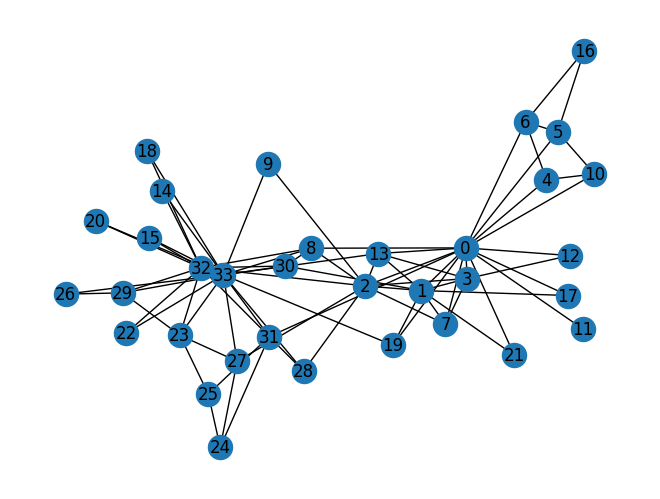

In [19]:
import networkx as nx
G = nx.karate_club_graph()

# visualize the graph

nx.draw(G, with_labels = True)

len(G.nodes), len(G.edges)


In [19]:
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import networkx as nx
import time
from part5_func import *

# Libraries that we need here, the other are in Part5_func



Running Girvan-Newman Algorithm...

[DEBUG] Iteration 0: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 31)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 1: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 2)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 2: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 8)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEBUG] Iteration 3: Calculating betweenness centrality...
[DEBUG] Removed edge: (13, 33)
[DEBUG] Communities: [[0, 1, 2, 3, 7, 12, 13, 8, 30, 32, 14, 33, 9, 15, 18, 19, 20, 23, 25, 24, 27, 31, 28, 29, 26, 22, 17, 21, 4, 6, 5, 10, 16, 11]]

[DEB

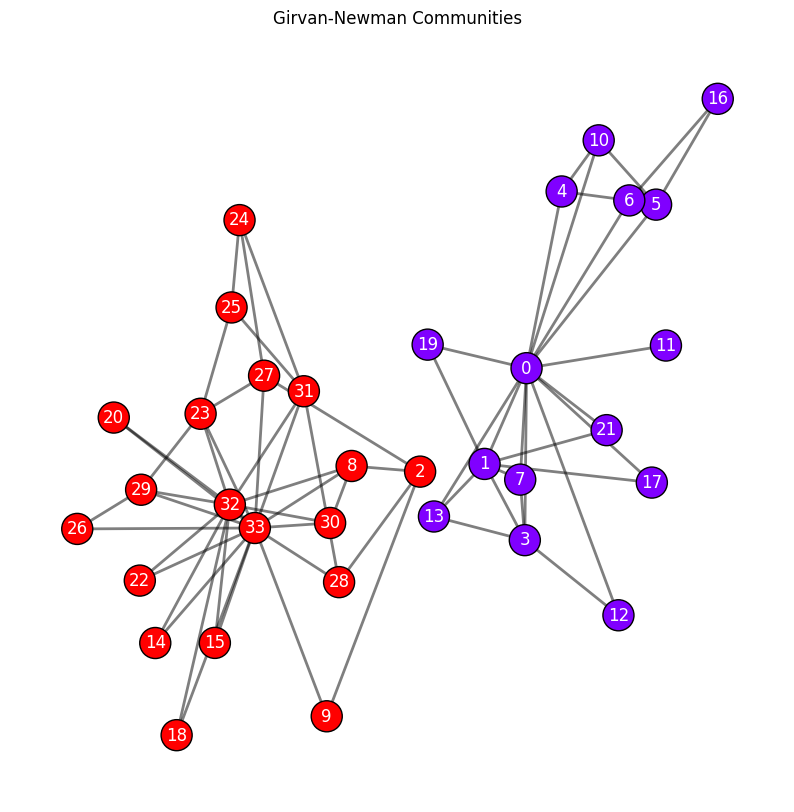

In [22]:
# Choose methods
betweenness_method = "bfs"  # Options: "bfs", "dijkstra"
component_method = "dfs_recursive"  # Options: "dfs_recursive", "dfs_iterative"

print("\nRunning Girvan-Newman Algorithm...")
communities, removed_edges = custom_girvan_newman(G, betweenness_method, component_method)

# Visualize Results
visualize_communities(G, communities, removed_edges)

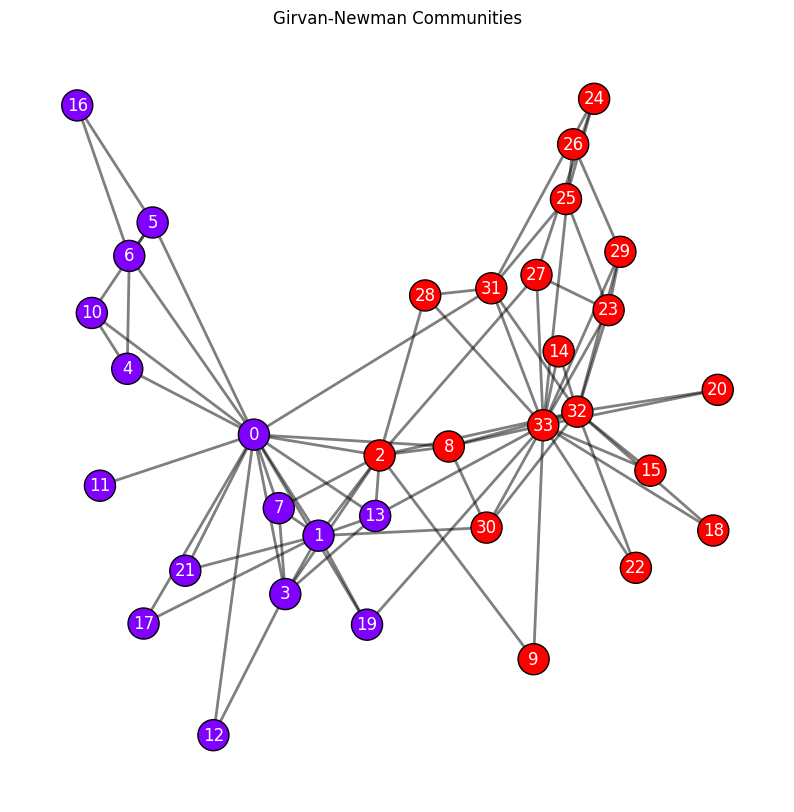

In [23]:
# Visualizing NetworkX implementation
from networkx.algorithms.community import girvan_newman as nx_girvan_newman
comp_gen = nx_girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp_gen)) 
communities = [list(c) for c in communities]

visualize_communities(G, communities)


In [24]:
# --- Test Girvan-Newman Algorithm ---
# --- Run Tests ---
if __name__ == "__main__":
    import networkx as nx

    # Create a test graph
    nx_G = nx.karate_club_graph()
    edges = list(nx_G.edges())
    G = Graph(edges)  # Custom graph

    # Testing different methods
    methods = ["bfs", "dijkstra"]  # Betweenness centrality methods
    component_methods = ["dfs_recursive", "dfs_iterative"]  # Component finding methods

    for betweenness_method in methods:
        for component_method in component_methods:
            test_girvan_newman(G, betweenness_method, component_method)



 ⚠️--- Testing with Custom Method: bfs | Component Method: dfs_recursive ---

[DEBUG] Iteration 0: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 31)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 1: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 2)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 2: Calculating betweenness centrality...
[DEBUG] Removed edge: (0, 8)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 13, 3, 7, 12, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 17, 21, 4, 10, 5, 16, 6, 11]]

[DEBUG] Iteration 3: Calculating betweenness centrality...
[DEBUG] Removed edge: (13, 33)
[DEBUG] Communities: [[0, 1, 2, 32, 33, 8, 30, 9, 14, 15, 18, 19, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 3, 7, 1

Faster implementation:

 ⚠️--- Testing with Custom Method: dijkstra | Component Method: dfs_recursive ---

Modularity is the same in any case, specifically the value is: Modularity: 0.35996055226824236


# Optimization Techniques for Community Detection

##### Spectral Clustering for Community Detection

**Input**:

- Graph \( G = (V, E) \) represented as an adjacency matrix.
- Number of clusters \( k \).

**Output**:

- Detected communities.

**Procedure**:

**Compute adjacency and degree matrices**:

    - \( \text{adj\_matrix} \) is the adjacency matrix of \( G \).
    - \( \text{degrees}[i][i] = \sum_j \text{adj\_matrix}[i][j] \) (diagonal degree matrix).

**Calculate the normalized Laplacian**:

    - Compute \( \text{D\_inv\_sqrt}[i][i] = \frac{1}{\sqrt{\text{degrees}[i][i]}} \).
    - Replace \( NaN \) values with \( 0 \) (to handle division by zero).
    - Compute the normalized Laplacian:
      \( L = I - \text{D\_inv\_sqrt} \times \text{adj\_matrix} \times \text{D\_inv\_sqrt} \).

**Perform eigenvalue decomposition**:

    - Compute eigenvalues and eigenvectors of \( L \).
    - Sort eigenvalues in ascending order.
    - Select eigenvectors corresponding to the \( k \) smallest non-trivial eigenvalues.

**Normalize the eigenvectors**:

    - Normalize each row of the eigenvector matrix.

**Apply K-means clustering**:

    - Use the \( k \)-dimensional eigenvector representation of nodes as input to K-means clustering.
    - Assign each node to a cluster based on the K-means result.

**Group nodes into communities**:

    - For each cluster, group the nodes that belong to it.

**Return**:

    - Detected communities.


In [27]:
import networkx as nx
# --- Test Spectral Clustering Algorithm ---
# Convert NetworkX karate club graph to edge list
nx_G = nx.karate_club_graph()
edges = list(nx_G.edges()) # Extract unweighted edges
G = Graph(edges) 

print("\n--- Spectral Clustering ---")
spectral_communities = spectral_clustering(G, k=2)
print("Spectral Communities:", spectral_communities)
adj_matrix, nodes = G.adjacency_matrix()  # Extract the adjacency matrix
print("Modularity:", calculate_modularity(adj_matrix, spectral_communities))



--- Spectral Clustering ---
Sorted Eigenvalues: [4.46085674e-16 1.32272329e-01 2.87048985e-01]
Converged at iteration 1
Spectral Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Modularity: 0.3714661406969083


##### Louvain Method for Community Detection

**Input**:

- Graph \( G = (V, E) \) represented as an adjacency matrix.
- Maximum number of iterations \( \text{max\_iter} \).

**Output**:

- Detected communities.
- Final modularity score.

**Procedure**:

**Initialize**:

    - Let \( n \) be the number of nodes in \( G \).
    - Compute \( \text{degrees}[i] = \sum_{j} G[i][j] \) for all nodes \( i \).
    - Set \( \text{inv\_m} = \frac{1}{\sum \text{degrees}} \) for modularity normalization.
    - Assign each node to its own community:
      \( \text{communities}[i] = i \).

**Define modularity gain**:

    - \( k_i = \text{degrees}[i] \).
    - Let \( \text{delta\_q} = 0 \).
    - For each neighbor \( j \) of node \( i \):
        - If \( j \) belongs to \( \text{target\_comm} \), increment \( \text{delta\_q} \) by \( G[i][j] \).
        - If \( j \) belongs to \( \text{curr\_comm} \), decrement \( \text{delta\_q} \) by \( G[i][j] \).
    - Compute the degree sums for the target and current communities:
        - \( \text{sum\_target} = \sum \text{degrees}[k] \, \forall k \in \text{target\_comm} \).
        - \( \text{sum\_curr} = \sum \text{degrees}[k] \, \forall k \in \text{curr\_comm} \).
    - Adjust \( \text{delta\_q} \):
        - \( \text{delta\_q} -= k_i \times (\text{sum\_target} - k_i) \times \text{inv\_m} \).
        - \( \text{delta\_q} += k_i \times (\text{sum\_curr} - k_i) \times \text{inv\_m} \).

**Iteratively refine communities**:

    - For \( \text{max\_iter} \) iterations:
        - Set \( \text{moved} = \text{False} \).
        - For each node \( i \):
            - Evaluate the modularity gain for moving \( i \) to each neighboring community.
            - Move \( i \) to the community with the highest modularity gain if it improves the modularity.
            - Update \( \text{moved} \) if any node was reassigned.
        - Terminate if no nodes were moved.

**Extract communities**:

    - Group nodes by their final community assignments.

**Return**:

    - Detected communities.
    - Final modularity score.


In [104]:
# --- Test Louvain Method ---
# Example usage
if __name__ == "__main__":
    # Generate test graph
    nx_G = nx.karate_club_graph()
    adj_matrix = nx.to_numpy_array(nx_G)

    print("\n--- Louvain Method with NumPy ---")
    communities = louvain_cluster(adj_matrix, max_iter=10)
    print("\nDetected Communities:", communities)

modularity = calculate_modularity(adj_matrix, communities)
print(f"Modularity: {modularity:.6f}")


--- Louvain Method with NumPy ---

Detected Communities: [[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [4, 10], [5, 6, 16], [8, 9, 14, 15, 18, 20, 22, 30, 32, 33], [23, 24, 25, 27, 28, 31], [26, 29]]
Modularity: 0.418677


#### **1. Lambiotte Coefficient (Node Importance)**
The **Lambiotte Coefficient** measures how central a node is to its community. It evaluates the proportion of connections a node has within its assigned community relative to all possible connections.

- **Formula**:
  
  $L(n) = \frac{\text{Internal Degree of Node } n}{\text{Degree of Node } n}$

  Where:
  - **Internal Degree**: Number of edges the node shares with nodes in its own community.
  - **Degree**: Total number of edges connected to the node.

- **Interpretation**:
  - Values close to **1.0**: The node is strongly integrated into its community and most of its connections are internal.
  - Lower values (e.g., 0.5): The node has significant connections outside its community, making it less central.

---

#### **2. Clauset's Parameter (Community Strength)**
The **Clauset's Parameter** measures the cohesion or density of a community relative to the entire graph. It evaluates how well a community is connected internally versus its connections to other communities.

- **Formula**:
  
  $C(C_i) = \frac{\text{Internal Edges in } C_i}{\text{Total Edges Involving Nodes in } C_i}$
  
  
  Where:
  - **Internal Edges**: Edges within the community.
  - **Total Edges**: All edges involving nodes in the community, including external edges.

- **Interpretation**:
  - Values close to **1.0**: The community is highly cohesive, with most of its edges being internal.
  - Lower values: The community has weaker internal cohesion, with many external connections.


In [30]:
#!pip uninstall community
#!pip install python-louvain
#!pip install tabulate

In [31]:
import networkx as nx

import time

# --- Testing Custom vs Pre-Implemented ---
if __name__ == "__main__":
    # Test Graph
    nx_G = nx.karate_club_graph()
    adj_matrix = nx.to_numpy_array(nx_G)

    # --- Custom Spectral Clustering ---
    print("\n--- Custom Spectral Clustering ---")
    start_time = time.time()
    custom_communities = spectral_clustering(G, k=2)
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Custom Spectral Time: {custom_time:.6f} seconds")
    print("Custom Spectral Communities:", custom_communities)
    adj_matrix_spectral, nodes = G.adjacency_matrix()
    custom_modularity = calculate_modularity(adj_matrix_spectral, custom_communities)
    print(f"Custom Spectral Modularity: {custom_modularity:.6f}")

    # --- Pre-Implemented Spectral Clustering ---
    print("\n--- Pre-Implemented Spectral Clustering ---")
    start_time = time.time()
    spectral_communities = pre_implemented_spectral(nx_G, k=2)
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Pre-Implemented Spectral Time: {custom_time:.6f} seconds")

    print("Pre-Implemented Spectral Communities:", spectral_communities)
    pre_modularity = calculate_modularity(adj_matrix_spectral, spectral_communities)
    print(f"Pre-Implemented Spectral Modularity: {pre_modularity:.6f}")

    # --- Run Comparisons ---
    print("\n--- Comparison Results ---")
    compare_methods(custom_communities, spectral_communities, "Spectral Clustering")

    # --- Custom Louvain ---
    print("\n--- Custom Louvain Method ---")
    start_time = time.time()
    edges_louvain = [(u, v, 1) for u, v in nx_G.edges()]
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Custom Louvain Time: {custom_time:.10f} seconds")
    custom_louvain = louvain_cluster(adj_matrix, max_iter=15)
    print("Custom Louvain Communities:", custom_louvain)
    custom_modularity = calculate_modularity(adj_matrix, custom_louvain)
    print(f"Custom Louvain Modularity: {custom_modularity:.6f}")
    
    # --- Pre-Implemented Louvain ---
    print("\n--- Pre-Implemented Louvain Method ---")
    start_time = time.time()
    pre_louvain = pre_louvain_method(nx_G)
    end_time = time.time()
    custom_time = end_time - start_time
    print(f"⏱️ Pre-Implemented Louvain Time: {custom_time:.10f} seconds")
    print("Pre-Implemented Louvain Communities:", pre_louvain)
    pre_modularity = calculate_modularity(adj_matrix, pre_louvain)
    print(f"Pre-Implemented Louvain Modularity: {pre_modularity:.6f}")

    # --- Run Comparisons ---
    print("\n--- Comparison Results ---")
    compare_methods(custom_louvain, pre_louvain, "Louvain Clustering")
    # Compare Communities
    compare_communities_overlap(custom_louvain, pre_louvain, "Louvain Clustering")
    evaluate_community_metrics(adj_matrix, custom_communities, "Custom Louvain Clustering")



--- Custom Spectral Clustering ---
Sorted Eigenvalues: [4.46085674e-16 1.32272329e-01 2.87048985e-01]
Converged at iteration 1
⏱️ Custom Spectral Time: 0.002624 seconds
Custom Spectral Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Custom Spectral Modularity: 0.371466

--- Pre-Implemented Spectral Clustering ---
⏱️ Pre-Implemented Spectral Time: 0.009348 seconds
Pre-Implemented Spectral Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Pre-Implemented Spectral Modularity: 0.371466

--- Comparison Results ---

--- Comparing Spectral Clustering ---
Custom Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Pre-Implemented Communities: [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 1

Spectral Clustering is 15 times faster, results are the same

The Custom method aligns well with the pre-implemented approach for major communities, though it sometimes splits larger communities into smaller subsets. Its strenght btw is its computational efficency: it runs a lot faster than the pre-implemented function, but the gain in computational resources we'll be seen more clearly on a larger dataset

### Let's see how it works on the real Dataset

In [3]:
import pandas as pd
df = pd.read_csv("USA_AirportDf_Nans_filled.csv") # Input from Yara's last work
df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,41.990311,-93.622154
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [252]:
df.columns

Index(['Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')

In [240]:
import pandas as pd

# Starting boundary points
# https://www.quora.com/What-is-the-longitude-and-latitude-of-a-bounding-box-around-the-continental-United-States#:~:text=What%20are%20the%20latitude%20and,N%20(Top%20to%20bottom).

# This value were tuned until the map looked good
US_LAT_MIN = 18.7763  # Hawaii's southernmost point
US_LAT_MAX = 71.5388  # Alaska's northernmost point
US_LONG_MIN = -179.148909  # Alaska's westernmost point
US_LONG_MAX = -66.93457  # Maine's easternmost point

outside_us = df[
    (df["Org_airport_lat"] < US_LAT_MIN) | (df["Org_airport_lat"] > US_LAT_MAX) |
    (df["Org_airport_long"] < US_LONG_MIN) | (df["Org_airport_long"] > US_LONG_MAX) 
    ]


print("Airports outside the US:")
print(outside_us)


Airports outside the US:
        Origin_airport Destination_airport       Origin_city  \
35094              NZC                 CAK  Jacksonville, FL   
35283              UCA                 CAK         Utica, NY   
82272              NZC                 MIA  Jacksonville, FL   
94029              NZC                 MIA  Jacksonville, FL   
94075              NZC                 MIA  Jacksonville, FL   
...                ...                 ...               ...   
3361866            UCA                 ACY         Utica, NY   
3361868            UCA                 ACY         Utica, NY   
3361997            NZC                 ACY  Jacksonville, FL   
3444109            SAW                 TVC     Marquette, MI   
3453716            MQJ                 KY3  Indianapolis, IN   

           Destination_city  Passengers  Seats  Flights  Distance    Fly_date  \
35094             Akron, OH           0    122        1       738  2005-08-01   
35283             Akron, OH           0    1

We found mismatch coordinates for some of our data, we are gonna clean it

In [197]:
world_map = folium.Map(location=[37, -95], zoom_start=4)

# Add markers for airports outside the US
for _, row in outside_us.iterrows():
    folium.Marker(
        location=[row["Org_airport_lat"], row["Org_airport_long"]],
        icon=folium.Icon(color="red")
    ).add_to(world_map)

# Add US boundary rectangle
bounds = [
    [US_LAT_MIN, US_LONG_MIN],
    [US_LAT_MIN, US_LONG_MAX],
    [US_LAT_MAX, US_LONG_MAX],
    [US_LAT_MAX, US_LONG_MIN],
    [US_LAT_MIN, US_LONG_MIN]
]
folium.Polygon(bounds, color="blue", fill=True, fill_opacity=0.2).add_to(world_map)

# Save and show the map
world_map.save("wrong_coordinates.html")

#world_map


To find the right coordinates for our boundary a little bit of trail and error was necessary + some Google!
Below the map that represent the actual borders of US

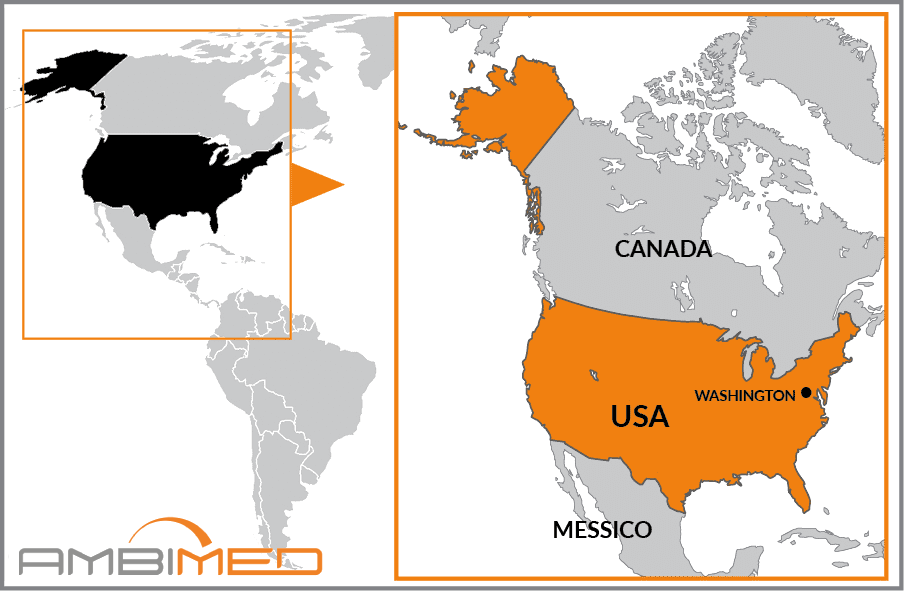

In [253]:
# Retrieve the origin and destination city information with wrong coordinates

origin_destination_info = outside_us[[
    "Origin_city", "Destination_city",
    "Org_airport_lat", "Org_airport_long",
    "Dest_airport_lat", "Dest_airport_long"
]].drop_duplicates()

origin_destination_info.columns = [
    "Origin_City", "Destination_City",
    "Origin_Latitude", "Origin_Longitude",
    "Destination_Latitude", "Destination_Longitude"
]

print("Origin and Destination City Information with Coordinates:")

origin_destination_info.to_csv("origin_destination_coordinates.csv", index=False) # To send it to chatgpt :)


Origin and Destination City Information with Coordinates:


In [4]:
correct_coordinates = {
    "Jacksonville, FL": (30.3322, -81.6557),
    "Akron, OH": (41.0814, -81.5190),
    "Utica, NY": (43.1009, -75.2327),
    "Miami, FL": (25.7617, -80.1918),
    "Marquette, MI": (46.5436, -87.3954),
    "Omaha, NE": (41.2565, -95.9345),
    "Albany, NY": (42.6526, -73.7562),
    "Chicago, IL": (41.8781, -87.6298),
    "Dallas, TX": (32.7767, -96.7970),
    "Grenada, MS": (33.7690, -89.8081),
    "Kokomo, IN": (40.4864, -86.1336),
    "Newark, NJ": (40.7357, -74.1724),
    "Toledo, OH": (41.6528, -83.5379),
    "Austin, TX": (30.2672, -97.7431),
    "Tucson, AZ": (32.2226, -110.9747),
    "Big Spring, TX": (32.2504, -101.4787),
    "Abilene, TX": (32.4487, -99.7331),
    "Atlanta, GA": (33.7490, -84.3880),
    "Detroit, MI": (42.3314, -83.0458),
    "Memphis, TN": (35.1495, -90.0490),
    "Midland, TX": (31.9973, -102.0779),
    "Orlando, FL": (28.5383, -81.3792),
    "Raleigh, NC": (35.7796, -78.6382),
    "Roanoke, VA": (37.2707, -79.9414),
    "Appleton, WI": (44.2619, -88.4154),
    "Columbia, SC": (34.0007, -81.0348),
    "Columbus, OH": (39.9612, -82.9988),
    "Hudson, NY": (42.2529, -73.7902),
    "Hartford, CT": (41.7658, -72.6734),
    "New York, NY": (40.7128, -74.0060),
    "Richmond, VA": (37.5407, -77.4360),
    "Savannah, GA": (32.0809, -81.0912),
    "Syracuse, NY": (43.0481, -76.1474),
    "Allentown, PA": (40.6084, -75.4902),
    "Anchorage, AK": (61.2181, -149.9003),
    "Baltimore, MD": (39.2904, -76.6122),
    "Charlotte, NC": (35.2271, -80.8431),
    "Cleveland, OH": (41.4993, -81.6944),
    "Knoxville, TN": (35.9606, -83.9207),
    "Las Vegas, NV": (36.1699, -115.1398),
    "Milwaukee, WI": (43.0389, -87.9065),
    "Binghamton, NY": (42.0987, -75.9180),
    "Charleston, WV": (38.3498, -81.6326),
    "Greensboro, NC": (36.0726, -79.7920),
    "Harrisburg, PA": (40.2732, -76.8867),
    "Pittsburgh, PA": (40.4406, -79.9959),
    "Shreveport, LA": (32.5252, -93.7502),
    "Washington, DC": (38.9072, -77.0369),
    "Wilmington, NC": (34.2257, -77.9447),
    "Youngstown, OH": (41.0998, -80.6495),
    "Kalispell, MT": (48.1919, -114.3161),
    "Great Falls, MT": (47.5072, -111.3008),
    "Los Angeles, CA": (34.0522, -118.2437),
    "Minneapolis, MN": (44.9778, -93.2650),
    "Indianapolis, IN": (39.7684, -86.1581),
    "Philadelphia, PA": (39.9526, -75.1652),
    "Atlantic City, NJ": (39.3643, -74.4229),
    "Traverse City, MI": (44.7631, -85.6206),
    "Mount Sterling, KY": (38.0579, -83.9430),
    "Shelby, NC": (35.2923, -81.5356),
    "Raleigh, NC": (35.7796, -78.6382),
    "Russellville, AR": (35.2784, -93.1338)
}
def update_coordinates(df, correct_coordinates):
    # Extract latitude and longitude as separate dictionaries
    latitude_map = {city: coords[0] for city, coords in correct_coordinates.items()}
    longitude_map = {city: coords[1] for city, coords in correct_coordinates.items()}

    # Update Origin coordinates
    df["Org_airport_lat"] = df["Origin_city"].map(latitude_map).fillna(df["Org_airport_lat"])
    df["Org_airport_long"] = df["Origin_city"].map(longitude_map).fillna(df["Org_airport_long"])

    # Update Destination coordinates
    df["Dest_airport_lat"] = df["Destination_city"].map(latitude_map).fillna(df["Dest_airport_lat"])
    df["Dest_airport_long"] = df["Destination_city"].map(longitude_map).fillna(df["Dest_airport_long"])

    return df


df_corrected = update_coordinates(df, correct_coordinates)

In [5]:
# Double-check if any airports are still outside the US

US_LAT_MIN = 18.7763  # Hawaii's southernmost point
US_LAT_MAX = 71.5388  # Alaska's northernmost point
US_LONG_MIN = -179.148909  # Alaska's westernmost point
US_LONG_MAX = -66.93457  # Maine's easternmost point

outside_us_attempt2 = df_corrected[
    (df_corrected["Org_airport_lat"] < US_LAT_MIN) | (df_corrected["Org_airport_lat"] > US_LAT_MAX) |
    (df_corrected["Org_airport_long"] < US_LONG_MIN) | (df_corrected["Org_airport_long"] > US_LONG_MAX)
]

print("Airports outside the US:")
outside_us_attempt2

Airports outside the US:


,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long


In [6]:
df = df_corrected

In [ ]:
df.to_csv('FinalDatasetForReal.csv')

### Experimenting on Real Dataset

In [219]:
# Create a graph from the dataset
city_graph = df_to_adjacency_list(df)

In [220]:
print_graph(city_graph, sample_size=1)


Adjacency List Sample (First 1 Nodes):
--------------------------------------------------
Manhattan, KS: ['Philadelphia, PA', 'Dallas, TX', 'Omaha, NE', 'Salt Lake City, UT', 'Great Bend, KS', 'Colorado Springs, CO', 'Lubbock, TX', 'Baltimore, MD', 'Oklahoma City, OK', 'Tulsa, OK', 'Lincoln, NE', 'Waco, TX', 'Cedar Rapids, IA', 'Orlando, FL', 'Waterloo, IA', 'Albuquerque, NM', 'Tucson, AZ', 'Spokane, WA', 'Kansas City, MO', 'South Bend, IN', 'Fresno, CA', 'Indianapolis, IN', 'Jacksonville, FL', 'Little Rock, AR', 'Pittsfield, MA', 'Des Moines, IA', 'Green Bay, WI', 'Kearney, NE', 'Houston, TX', 'New Orleans, LA', 'Garden City, KS', 'Austin, TX', 'Nashville, TN', 'Salina, KS', 'Hattiesburg, MS', 'Bozeman, MT', 'Columbus, OH', 'Lafayette, LA', 'Bloomington, IL', 'Montgomery, AL', 'Hartford, CT', 'Cleveland, OH', 'Wichita, KS', 'St. Louis, MO', 'Stillwater, OK', 'Savannah, GA', 'Rochester, NY', 'Madison, WI', 'Columbia, SC', 'Terre Haute, IN', 'Champaign, IL', 'Hays, KS', 'Akron, OH', 'Li

In [211]:
edges = sum(len(neighbors) for neighbors in city_graph.values()) // 2  
nodes = len(city_graph)
density = (2 * edges) / (nodes * (nodes - 1)) if nodes > 1 else 0  
print(f"Graph Density: {density:.4f}")

Graph Density: 0.1178


Graph density of 0.1178 indicates that the graph is relatively sparse, with only about 11.8% of the possible edges between nodes present. Sparse graphs can pose challenges for community detection algorithms, in particular the one like Girvan-Newman, which rely on edge removal to split the graph into meaningful communities.

Challenges:
- Sparse graphs often lack sufficient edge redundancy to support stable community splits, leading to fragmented communities and limited modularity improvement.

- If edges are distributed without strong clusters, detecting clear community boundaries becomes harder.

- Modularity favors dense, well-connected communities, but sparse graphs inherently lack such structures.

### Complexity of the Girvan–Newman algorithm

- Complexity: $O(N*E)$ This is done for all edges in the graph.
- Removing the edge with the highest betweenness: This operation occurs $E$ times.

Total complexity is approximately: $O(E⋅(N⋅E))=O(N⋅E^2)$

In [13]:
N = 563   # Number of nodes
E = 37262   # Number of edges

# Complexity calculation
estimated_operations = N * (E ** 2)
estimated_operations

781701090572

In [14]:
# Estimate how many operation per second my CPU can do
n = 10**7
ops_per_second = operation_test(n)
print(f"Approximate operations per second: {ops_per_second:.2f}")


Approximate operations per second: 21665688.66


In [15]:
estimated_time_seconds = estimated_operations / ops_per_second
estimated_time_hours = estimated_time_seconds / 3600

estimated_time_hours

10.022261243794668

I did this test cause i wanted to try the algorithms also on the main dataset but I didn't expected it would require so much time. That's why we are just gonna apply our efficient implementation of Louvain method

### Implementation of Louvain method on the Main Dataset

In [221]:
# Adding weights allow us to give more importance to most trafficated airports, this will provide us more meaningfull results
adj_matrix, city_to_idx = df_to_adjacency_matrix(df, weight_col="Passengers")

In [222]:
import time

# Apply Louvain clustering 
print("\n--- Louvain Method with NumPy ---")
start_time = time.time()  # Start timer
communities = louvain_cluster(adj_matrix, max_iter=50)
end_time = time.time()  # End timer

# Print debug information and time taken
print("DEBUG: Type of community_labels:", type(communities))
print("DEBUG: Example of community_labels:", communities[:10])
print(f"DEBUG: Time taken for Louvain clustering: {end_time - start_time:.4f} seconds")


--- Louvain Method with NumPy ---
DEBUG: Type of community_labels: <class 'list'>
DEBUG: Example of community_labels: [[0, 45, 53, 56, 60, 61, 69, 70, 73, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 95, 96, 99, 100, 102, 104, 106, 110, 113, 114, 116, 119, 121, 122, 123, 125, 129, 131, 132, 137, 139, 144, 145, 146, 147, 151, 152, 154, 176, 184, 209, 222, 227, 231, 237, 244, 248, 250, 251, 252, 259, 264, 282, 284, 286, 288, 295, 296, 298, 299, 302, 304, 305, 316, 317, 332, 356, 358, 361, 363, 368, 371, 373, 378, 386, 392, 394, 403, 418, 422, 425, 439, 440, 446, 451, 457, 463, 473, 482, 506, 549, 562], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 39, 41, 43, 46, 48, 49, 50, 51, 54, 58, 63, 65, 66, 68, 72, 74, 85, 87, 97, 101, 103, 109, 111, 115, 118, 128, 130, 133, 143, 148, 150, 155, 158, 160, 162, 225, 247, 249, 257, 261, 262, 269, 275, 277, 278, 294, 300, 301, 312, 313, 314, 315, 339, 342, 351, 352, 353

In [223]:
readable_communities = convert_communities_to_readable(communities)
print("readable communities:", readable_communities)

modularity = calculate_modularity(adj_matrix, readable_communities)
print("Modularity:", modularity)


readable communities: [[0, 45, 53, 56, 60, 61, 69, 70, 73, 79, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 95, 96, 99, 100, 102, 104, 106, 110, 113, 114, 116, 119, 121, 122, 123, 125, 129, 131, 132, 137, 139, 144, 145, 146, 147, 151, 152, 154, 176, 184, 209, 222, 227, 231, 237, 244, 248, 250, 251, 252, 259, 264, 282, 284, 286, 288, 295, 296, 298, 299, 302, 304, 305, 316, 317, 332, 356, 358, 361, 363, 368, 371, 373, 378, 386, 392, 394, 403, 418, 422, 425, 439, 440, 446, 451, 457, 463, 473, 482, 506, 549, 562], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 37, 39, 41, 43, 46, 48, 49, 50, 51, 54, 58, 63, 65, 66, 68, 72, 74, 85, 87, 97, 101, 103, 109, 111, 115, 118, 128, 130, 133, 143, 148, 150, 155, 158, 160, 162, 225, 247, 249, 257, 261, 262, 269, 275, 277, 278, 294, 300, 301, 312, 313, 314, 315, 339, 342, 351, 352, 353, 354, 359, 372, 380, 397, 399, 400, 401, 402, 404, 405, 421, 424, 452, 481, 484, 486, 487, 490, 

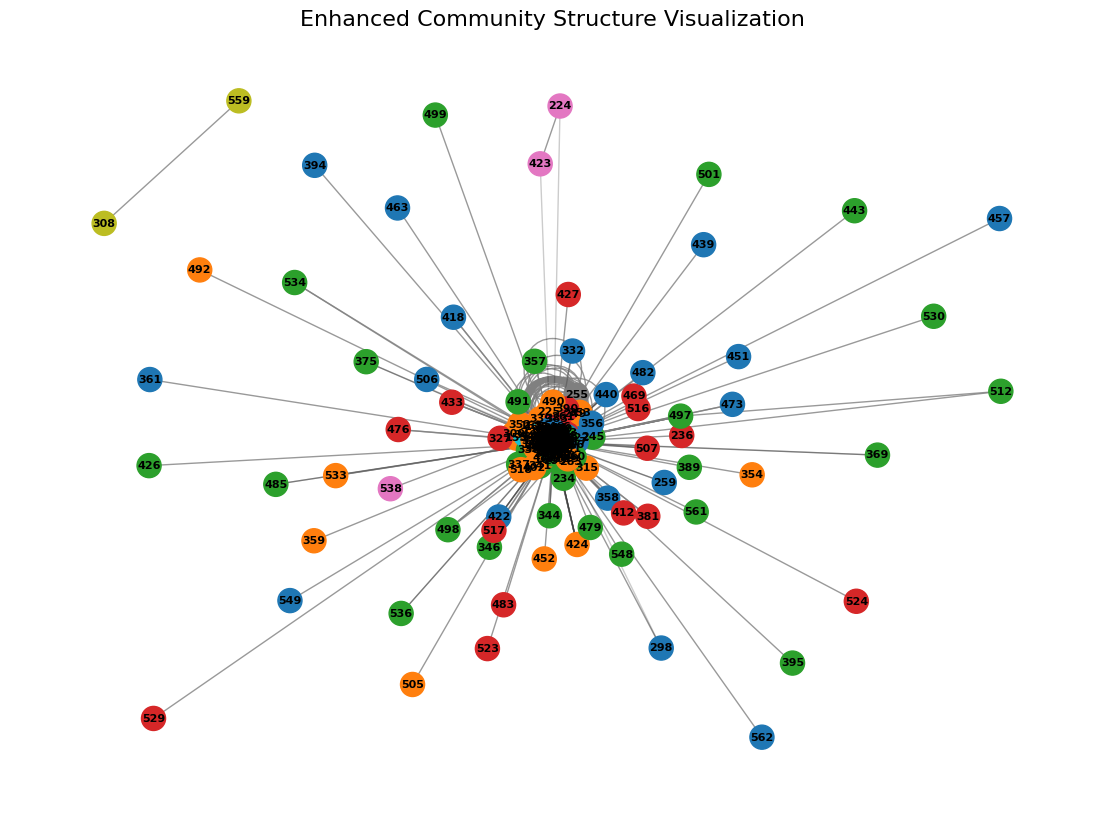

In [224]:
plot_communities_air(adj_matrix, readable_communities)

In [267]:
colored_connections_map = plot_communities_with_colored_connections(df, adj_matrix, readable_communities, city_to_idx)
colored_connections_map.save("connections_map.html")  # Save the map to an HTML file
#colored_connections_map  # Display the map in Jupyter/Colab


### I was almost forgetting to answer to question 5.2

2. The function takes the following inputs:

- Flight network
- A city name *c1*
- A city name *c2*
  
3. The function outputs:

- The total number of communities and the cities that belong to each community
- Visualize the graph highlighting the communities within the network (each community with different color)
- If city c1 and c2 belong to the same community or not


In [ ]:
cities = list(set(df["Origin_city"]).union(df["Destination_city"]))
analyze_flight_network(adj_matrix, cities, "Eugene, OR", "Bend, OR")


City Eugene, OR and City Bend, OR belong to the same community: True



In [49]:
# Let's stake a small state that is far away from Oregon to ensure everything works correctly
analyze_flight_network(adj_matrix, cities, "Eugene, OR", "Fort Leonard Wood, MO")


City Eugene, OR and City Fort Leonard Wood, MO belong to the same community: False



### Ask LLM

Some consideration:
- He knew I was working with Louvain Method
- First time I gave the prompt it suggested me to use Girvan-Newman Algorithm but since I already implemented it I asked for an other one
- I asked to use the same Nx graph we were using as a test to compare results with all the other algorithms we tried

##### Alternative Algorithm: Label Propagation Algorithm (LPA)
The Label Propagation Algorithm uses a semi-supervised learning approach where nodes are labeled based on the majority of their neighbors' labels. Communities naturally emerge as nodes adopt similar labels to those they are closely connected with.

Steps to Implement the Label Propagation Algorithm:

- Initialize Labels: Assign a unique label to each node in the graph.

- Iterative Update: For each node, update its label to the one that is most common among its neighbors. Ties can be broken randomly.

- Convergence: Repeat until no labels change or a maximum number of iterations is reached.

- Extract Communities: Nodes with the same label are grouped into the same community.

Advantages of Label Propagation Algorithm:

- Scalability: Highly efficient and suitable for large graphs.

- Flexibility: Works well without requiring prior knowledge about the number of communities.

- Simplicity: Straightforward implementation without heavy computational overhead.


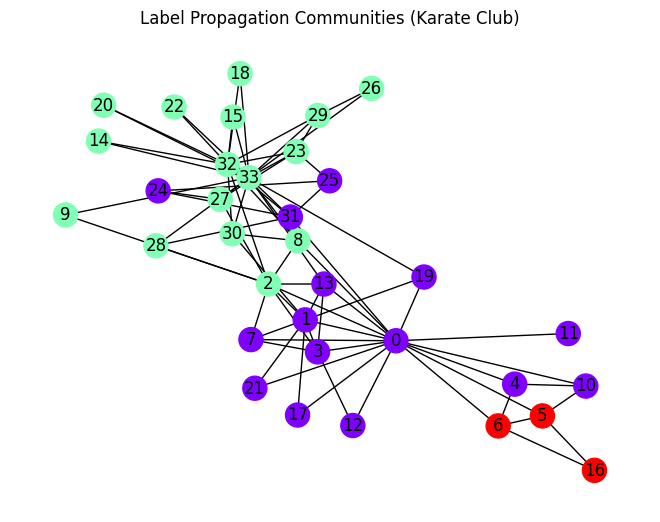

0.30948632896684836

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities

# Load the Karate Club graph
graph = nx.karate_club_graph()

# Detect communities using Label Propagation Algorithm
lpa_communities = list(label_propagation_communities(graph))

# Visualize the communities
def visualize_communities(graph, communities, title):
    # Assign colors based on communities
    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i
    colors = [node_colors[node] for node in graph.nodes()]
    
    # Layout and drawing
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, node_color=colors, with_labels=True, cmap=plt.cm.rainbow)
    plt.title(title)
    plt.show()

# Visualize the detected communities
visualize_communities(graph, lpa_communities, "Label Propagation Communities (Karate Club)")
calculate_modularity(nx.to_numpy_array(graph), lpa_communities) # i added modularity check


##### Comment

I tried LPA during my tests in first phase cause it was recommended by the link of the article TA's shared for Q5 as Machine Learning approach. Nonethless it's pretty fast, it resulted in lower accurancy, in fact we have the lowest Modularity score recorded.

To make it a fair comparison I am gonna compare it also on the Airport Dataset

Time taken for Label Propagation clustering on adjacency matrix: 0.0240 seconds


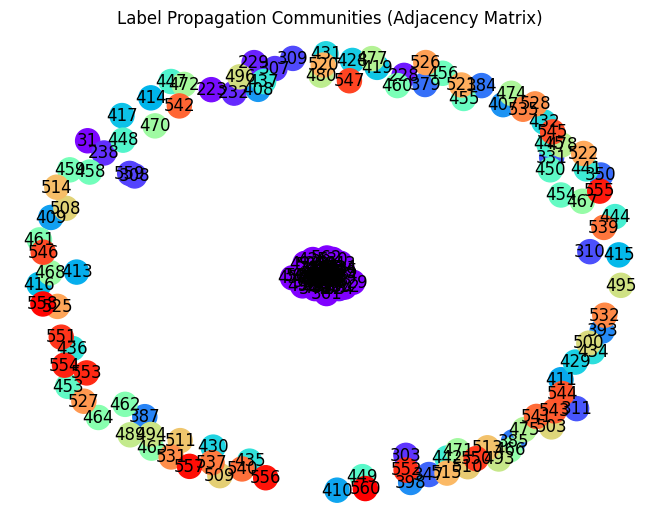

In [51]:
import numpy as np
import networkx as nx
import time
from networkx.algorithms.community import label_propagation_communities

graph_from_adj_matrix = nx.from_numpy_array(adj_matrix) # Convert the adjacency matrix to a NetworkX graph

start_time = time.time()

lpa_communities_from_adj_matrix = list(label_propagation_communities(graph_from_adj_matrix))

end_time = time.time()

print(f"Time taken for Label Propagation clustering on adjacency matrix: {end_time - start_time:.4f} seconds")

visualize_communities(graph_from_adj_matrix, lpa_communities_from_adj_matrix, "Label Propagation Communities (Adjacency Matrix)")


In [52]:
analyze_communities(graph_from_adj_matrix, lpa_communities_from_adj_matrix)

=== Community Analysis ===
Total Communities Detected: 117

Community 1:
  Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 2

##### Final comment

Only 1 big community was founded and more than 100 communities with only one node. It is enough to say LPA performed really badly in our scenario, at least it was fast to run!